__AIM:__


  - Surprise Housing, a US-based real estate company, has made the decision to join the Australian market. The company buys houses below market value and resells them for a greater price. The company has collected a data set from the sale of houses in Australia.  

  - The goal of the company is:
   
    - To determine factors (like <span style='color:green'>LotFrontage</span>, <span style='color:green'>LotArea</span>, <span style='color:green'>GarageArea</span>) that may influence the house price in the Australian market.

    - To develop a regression model using regularisation based on those factors, that would explain the variations in the house price.

    - To know the R-squared or Mean Squared Error of the model, i.e. how well those factors capture the price of the house.

    - To ascertain the best lambda value for lasso and ridge regression. 

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [84]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.3f}'.format

In [85]:
# reading the dataset
house_df  = pd.read_csv("train.csv")

In [86]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [87]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [88]:
house_df.duplicated().sum()

0

In [89]:
#Observe columns having single value
unique = house_df.nunique()
unique.sort_values()

CentralAir          2
Utilities           2
Street              2
Alley               2
BsmtHalfBath        3
LandSlope           3
GarageFinish        3
HalfBath            3
MasVnrType          3
PavedDrive          3
PoolQC              3
FullBath            4
BsmtExposure        4
ExterQual           4
MiscFeature         4
BsmtFullBath        4
Fence               4
KitchenQual         4
BsmtCond            4
Fireplaces          4
LandContour         4
LotShape            4
KitchenAbvGr        4
BsmtQual            4
FireplaceQu         5
Electrical          5
YrSold              5
GarageCars          5
GarageQual          5
GarageCond          5
HeatingQC           5
ExterCond           5
MSZoning            5
LotConfig           5
BldgType            5
BsmtFinType2        6
Foundation          6
RoofStyle           6
SaleCondition       6
GarageType          6
BsmtFinType1        6
Heating             6
Functional          7
RoofMatl            8
HouseStyle          8
Condition2

#### Explore common statistics

In [90]:
def column_summary(df):
    summary_data = []
    
    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df

# Example usage:
# Assuming df is your DataFrame
summary_df = column_summary(house_df)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,Id,int64,0,1460,1460,"{1: 1, 982: 1, 980: 1, 979: 1, 978: 1, 977: 1,..."
1,MSSubClass,int64,0,1460,15,"{20: 536, 60: 299, 50: 144, 120: 87, 30: 69, 1..."
2,MSZoning,object,0,1460,5,"{'RL': 1151, 'RM': 218, 'FV': 65, 'RH': 16, 'C..."
3,LotFrontage,float64,259,1201,110,"{60.0: 143, 70.0: 70, 80.0: 69, 50.0: 57, 75.0..."
4,LotArea,int64,0,1460,1073,"{7200: 25, 9600: 24, 6000: 17, 9000: 14, 8400:..."
5,Street,object,0,1460,2,"{'Pave': 1454, 'Grvl': 6}"
6,Alley,object,1369,91,2,"{'Grvl': 50, 'Pave': 41}"
7,LotShape,object,0,1460,4,"{'Reg': 925, 'IR1': 484, 'IR2': 41, 'IR3': 10}"
8,LandContour,object,0,1460,4,"{'Lvl': 1311, 'Bnk': 63, 'HLS': 50, 'Low': 36}"
9,Utilities,object,0,1460,2,"{'AllPub': 1459, 'NoSeWa': 1}"


In [91]:
summary_df.to_csv("summary.csv")


#### Dropping irrelavant column
- **Id** is an identifier; it is not analytically useful factual data. It is therefore droppable.

In [92]:
house_df.drop('Id', axis=1, inplace=True)

#### Remove Columns with same values

In [93]:
def detect_col_same_values(df):
    if isinstance(df, pd.DataFrame):
        cols_identical_val = [col for col in df.keys() if df[col].value_counts(normalize=True, dropna=False).iloc[0]>=.99]
        df = df.drop(cols_identical_val, axis=1)
        print('List of columns removed since majority of their values are identical:\n\n', cols_identical_val)
        return df
    else:
        raise TypeError('Pass a DataFrame object')

2) Call the above function to drop the variables with most of the identical values as they will not add any value to the house price prediction

In [94]:
house_df = detect_col_same_values(house_df)

List of columns removed since majority of their values are identical:

 ['Street', 'Utilities', 'PoolArea', 'PoolQC']


#### Missing values
1) Determine the percentage of missing values in each column

In [95]:
nan_cols = house_df.isna().sum()[house_df.isna().sum()>0]
percentage_nan_cols = (round(nan_cols/len(house_df) * 100, 2)).sort_values(ascending=False)
percentage_nan_cols

MiscFeature    96.300
Alley          93.770
Fence          80.750
MasVnrType     59.730
FireplaceQu    47.260
LotFrontage    17.740
GarageType      5.550
GarageYrBlt     5.550
GarageFinish    5.550
GarageQual      5.550
GarageCond      5.550
BsmtExposure    2.600
BsmtFinType2    2.600
BsmtFinType1    2.530
BsmtCond        2.530
BsmtQual        2.530
MasVnrArea      0.550
Electrical      0.070
dtype: float64

2) Imputing the missing values of <span style='color:blue'>GarageYrBlt</span> with <span style='color:purple'>**0**</span>

In [96]:
house_df['GarageYrBlt'] = house_df['GarageYrBlt'].replace(np.nan, 0)

#### Derive New Features

1) Compute the years went by since the garage was built at the time of the sale.

In [97]:
house_df['GarageAge_AtSale'] = house_df['YrSold'] - house_df['GarageYrBlt']

2) After the property is constructed and renovated, determine its age at the time of sale

In [98]:
house_df['HouseAge_AtSale'] = house_df['YrSold'] - house_df['YearBuilt']
house_df['HouseAgeSinceRemodel_AtSale'] = house_df['YrSold'] - house_df['YearRemodAdd']

3) Compute Total Porch Area in square feet

In [99]:
house_df['TotalPorchAreaSF'] = house_df['OpenPorchSF'] + house_df['3SsnPorch'] + house_df['EnclosedPorch'] + house_df['ScreenPorch']

4) let's calculate the Total Basement Finished Area in square feet

In [100]:
house_df['TotalBasementFinAreaSF'] = house_df['BsmtFinSF1'] + house_df['BsmtFinSF2']

5) Derive Total Area of floors in square feet

In [101]:
house_df['TotalFloorAreaSF'] = house_df['1stFlrSF'] + house_df['2ndFlrSF']

#### Drop the variables which are already used to derive the ***Data Driven Metrics*** above

In [102]:
house_df.drop(['GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF', '2ndFlrSF',
                       'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch'],
                      axis=1,
                      inplace=True)

In [103]:
# Find the -ve value in "HouseAgeSinceRemodel_AtSale" column
print(house_df.loc[house_df['HouseAgeSinceRemodel_AtSale'] < 0, 'HouseAgeSinceRemodel_AtSale'])

523   -1
Name: HouseAgeSinceRemodel_AtSale, dtype: int64


In [104]:
# Replace the -ve value with 0 in "HouseAgeSinceRemodel_AtSale" column
house_df['HouseAgeSinceRemodel_AtSale'] = house_df['HouseAgeSinceRemodel_AtSale'].replace(-1, 0)

#### **Univariate Analysis on Quantitative Variables**

In [105]:
# Identify numerical columns
numerical_columns = house_df.select_dtypes(include=[np.number]).columns
numeric_df = house_df.loc[:,numerical_columns]

In [106]:
# date related columns 'YrSold', 'MoSold' can be eliminated from this dataframe with numerical columns
numeric_df = numeric_df.drop(['YrSold', 'MoSold'], axis=1)

2) select <span style='color:green'>top 15 numerical columns</span> with <span style='color:blue'>most number of unique values</span>

In [107]:
top_15_numerical = numeric_df.nunique(axis=0).sort_values(ascending=False)[:15]
top_15_numerical

LotArea                        1073
TotalFloorAreaSF                862
GrLivArea                       861
BsmtUnfSF                       780
TotalBsmtSF                     721
SalePrice                       663
TotalBasementFinAreaSF          637
GarageArea                      441
MasVnrArea                      327
TotalPorchAreaSF                287
WoodDeckSF                      274
HouseAge_AtSale                 122
LotFrontage                     110
GarageAge_AtSale                106
HouseAgeSinceRemodel_AtSale      61
dtype: int64

In [108]:
def plot_multiple_histograms_univar(dframe, colnames_idx):
    '''
    Plot histograms for univariate analysis.

    Params:
      dframe: Dataframe to read
      colnames_idx: Array of column names to access in the dataframe
    '''
    if not isinstance(colnames_idx, np.ndarray):
        raise TypeError('"colnames_idx" must be a numpy array')
    if isinstance(dframe, pd.DataFrame):
        try:
            fig, ax = plt.subplots(nrows=8, ncols=2, sharex=False, sharey=False)
            fig.set_size_inches(11, 25)
            for colnames, axes in zip(colnames_idx, [(0, 0), (0, 1),
                                                     (1, 0), (1, 1),
                                                     (2, 0), (2, 1),
                                                     (3, 0), (3, 1),
                                                     (4, 0), (4, 1),
                                                     (5, 0), (5, 1),
                                                     (6, 0), (6, 1),
                                                     (7, 0), (7, 1)]):
                num, bin, _ = ax[axes[0], axes[1]].hist(x=dframe[colnames], bins=50, edgecolor='red', color='cyan')
                ax_kde= ax[axes[0], axes[1]].twinx()
                sns.kdeplot(dframe[colnames], ax=ax_kde, color='purple')
                ax[axes[0], axes[1]].set_xlabel(colnames, color='red')
                sorted_bins = sorted(zip(np.round(num, 1), zip(np.round(bin[:-1], 1), np.round(bin[1:], 1))),
                                     key=lambda x:x[0],
                                     reverse=True)
                ax[axes[0], axes[1]].set_title(f'most common bin: {sorted_bins[0][1]} \n2nd most common bin: {sorted_bins[1][1]} \nmin: {bin.min().astype(int)},  max: {bin.max().astype(int)} \nskew: {round(dframe[colnames].skew(), 2)},  kurtosis: {round(dframe[colnames].kurtosis(), 2)}',
                                               fontsize=9, fontweight=30, color='black', loc='left')
                ax_kde.set_ylabel('')
                ax_kde.tick_params(labelright=False)
            ax[7, 1].set_axis_off()
            fig.tight_layout()
            fig.suptitle('Frequency Distribution + KDE of numerical columns', fontsize=15, color='blue', x=0.5, y=1.03)
            # fig.supylabel('Frequency', fontsize=15, color='blue', x=0, y=.53)
            fig.show()
        except Exception as e:
            raise e
    else:
        raise TypeError('"dframe" must be a dataframe object')        

2) Plot Histograms to visualize the frequency distribution of those selected <span style='color:blue'>15 numerical columns</span>

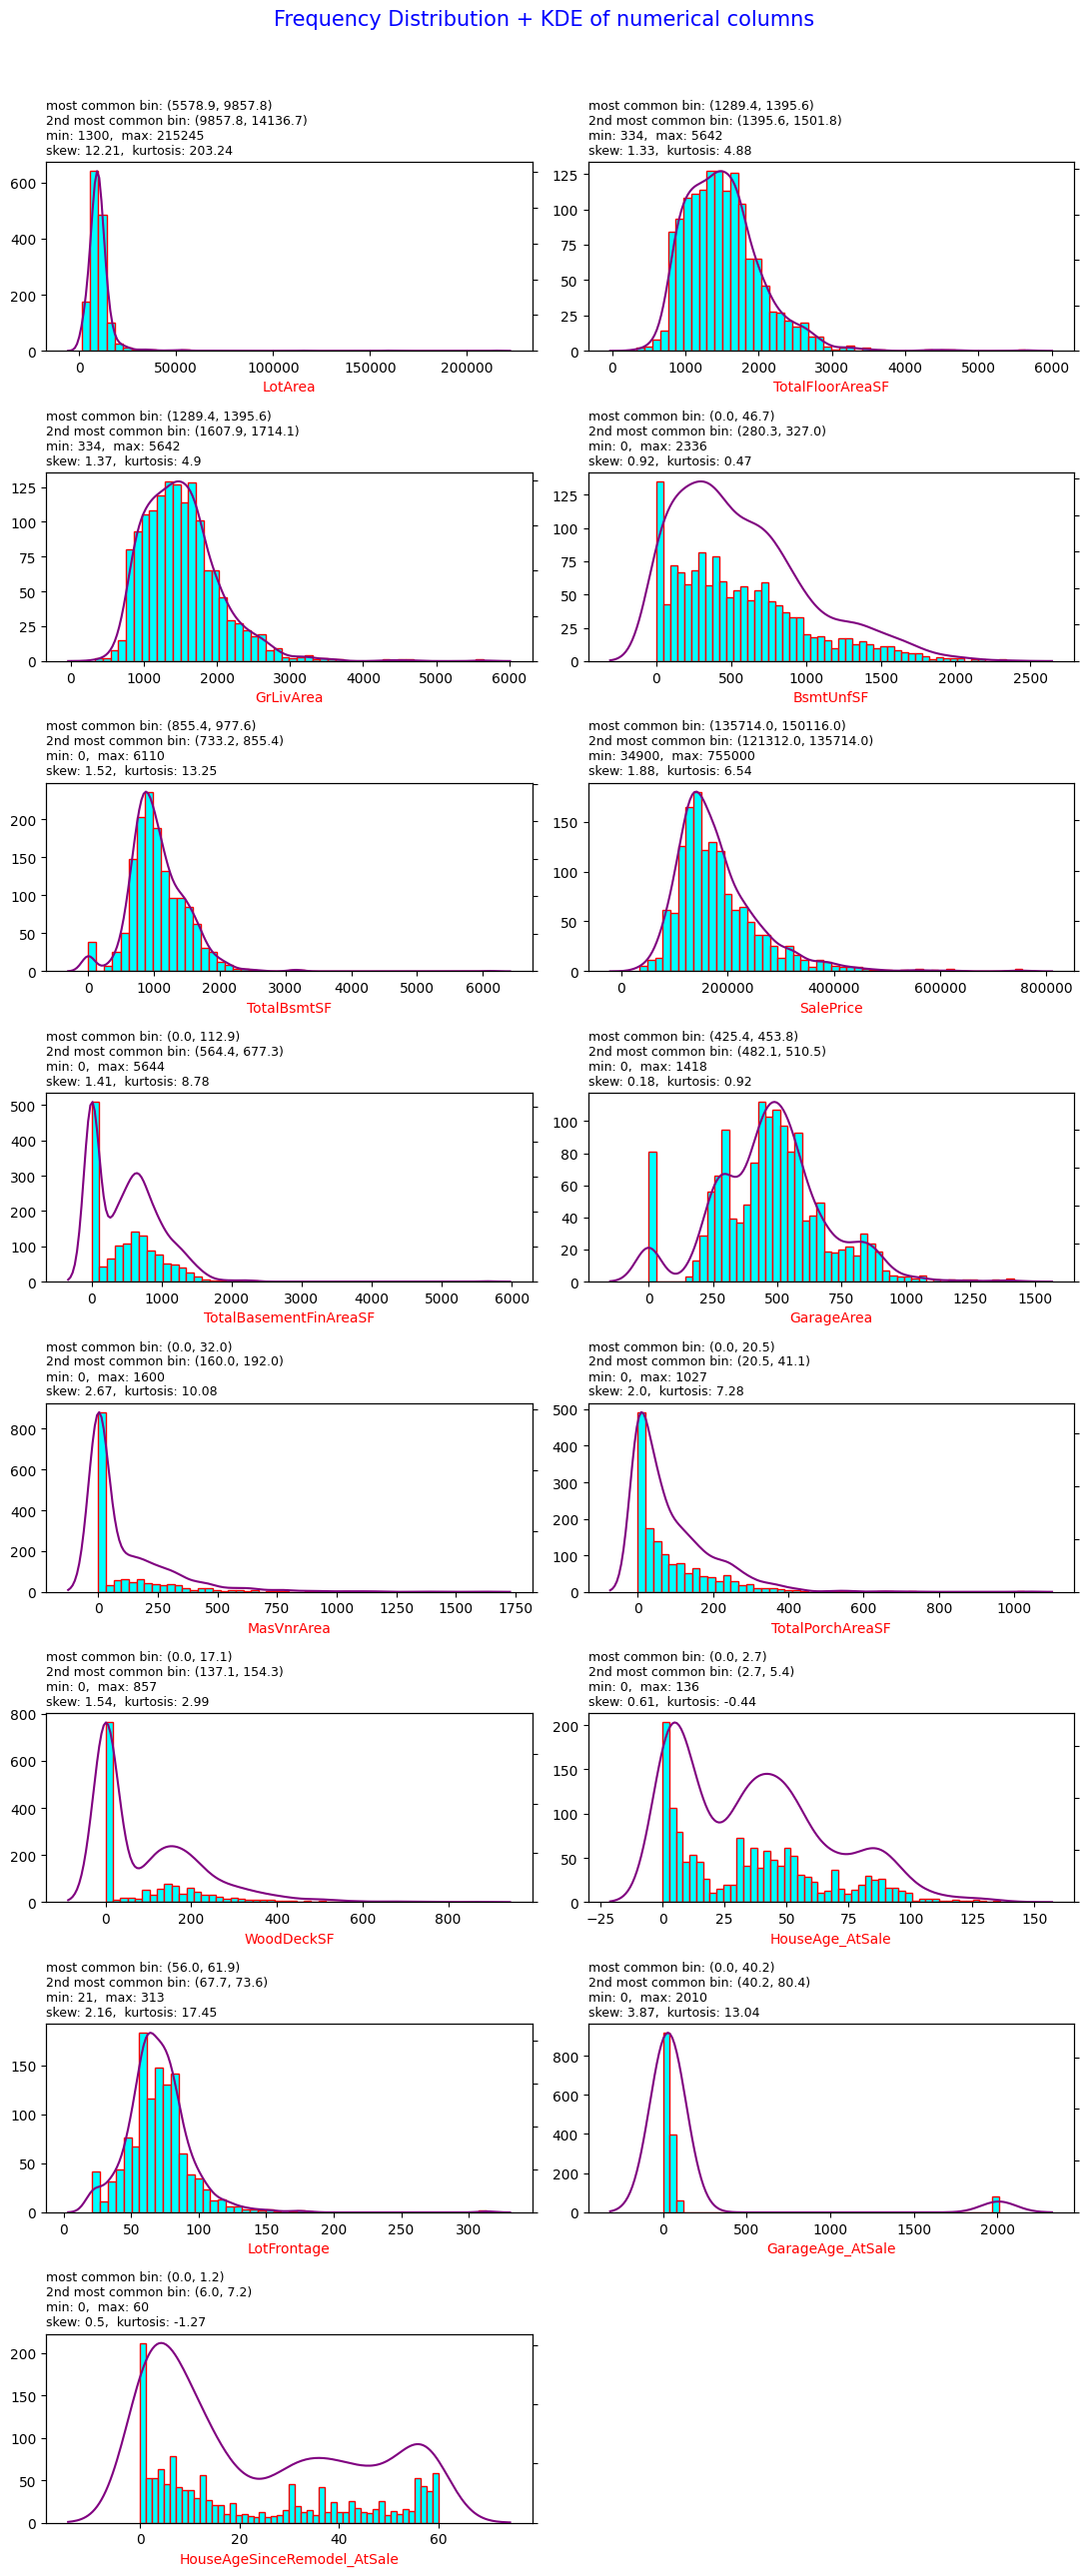

In [109]:
plot_multiple_histograms_univar(house_df, top_15_numerical.index.values)

- <span style='color:purple'>Interpretations from above histograms</span>



  - **SalePrice** - Consumers typically purchase reasonably priced homes or properties between 120K and 150K AUD. 

  - The majority of sold properties in Australia have **LotArea** between 5000 and 14000 square feet, suggesting that buyers are more inclined to purchase reasonably priced properties with significantly larger lots.

  - **GrLivArea** - Customers find it more comfortable to purchase houses with a living area of between 1000 and 2000 square feet.<br> 
  
  - Buyers want residences with sufficient open areas outside the floor area, especially given the preferred lot sizes.

  - <span style='color:purple'>The combined size of the homes' first and second floors equals the living area above ground.</span> So, we can eliminate the derived metric **TotalFloorAreaSF** from the dataset as it hardly differs from **GrLivArea**. 

  - Unfinished basements are least preferred among buyers as hinted by **BsmtUnfSF**.

  - The ideal basement space **TotalBsmtSF** is roughly 700–1200 square feet, which is less than the total floor area.

  - Real estate buyers appreciate **GarageArea**, even though many do not choose to have them instead. Maybe because they were able to locate parking spots for their automobiles in the lot

  - **MasVnrArea** - Masonry veneer is not present in the majority of the buildings.

  - As is typically the case with home designs, the **TotalPorchAreaSF** of real estate properties that consumers purchase is noticeably smaller in square feet than the total lot size of those properties.

  - **HouseAge_AtSale** & **GarageAge_AtSale** - Newer homes with garages that aren't too ancient are preferred by buyers.

  - **HouseAgeSinceRemodel_AtSale** - Recently refurbished properties are more likely to draw in clients.

4) Drop the derived metric ```TotalFloorAreaSF``` from the dataset as it is found similar to ```GrLivArea``` as explained above 

In [110]:
house_df.drop('TotalFloorAreaSF', axis=1, inplace=True)

#### **Detect and Treat Outliers**

1) Create a function to eliminate outliers using Tukey's boxplot method that identifies outliers outside of the range `(q1-1.5*IQR)` and `(q3+1.5*IQR)`

In [111]:
def detect_and_treat_outliers(dframe, exclude_col=''):
    if isinstance(dframe, pd.DataFrame) and isinstance(exclude_col, str):
        for var in dframe.select_dtypes(exclude=object).keys():
            if var not in exclude_col:
                Q1 = dframe[var].quantile(.25)
                Q3 = dframe[var].quantile(.75)
                IQR = Q3-Q1
                dframe = dframe[(dframe[var] >= (Q1-(1.5*IQR))) & (dframe[var] <= (Q3+(1.5*IQR)))]
            return dframe.reset_index(drop=True)
    else:
        raise TypeError('Error: Passed arguments must be dataframe object and/or a column name as a string literal')

2) Execute the above function to remove the outliers

In [112]:
house_df = detect_and_treat_outliers(house_df, exclude_col='SalePrice')

In [113]:
house_df.shape

(1357, 70)

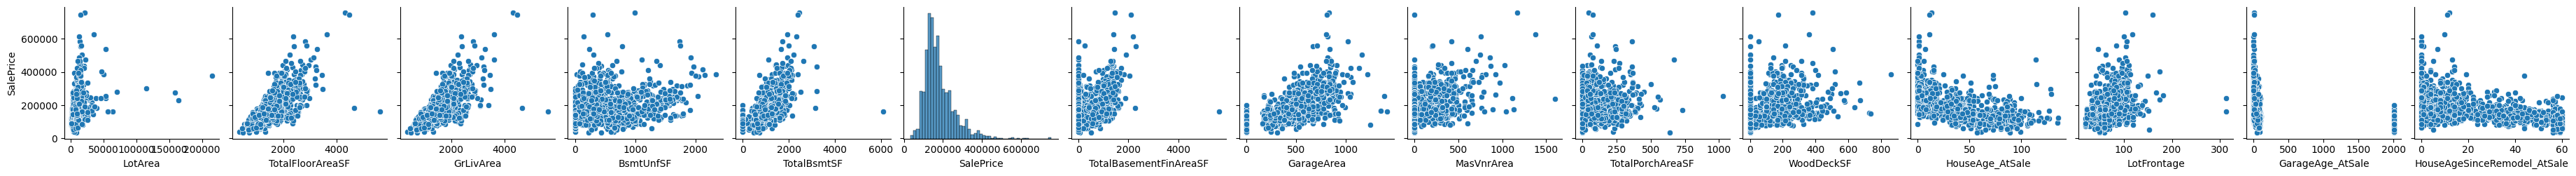

In [114]:
sns.pairplot(data=numeric_df, x_vars= top_15_numerical.index.values, y_vars='SalePrice')

- <span style='color:purple'>Interpretation</span>

 - As living area increases, so does the cost of buying a property. Hence, **GrLivArea** is highly significant to SalePrice

  - Total square feet of basement area (**TotalBsmtSF**) moderately influence the price of the house

  - Capacity of the Garage (**GarageCars**) or total Garage Area (**GarageArea**) have moderate correlation with SalePrice

2) <span style='color:green'>Heatmap to show Pairwise Correlations of numerical variables</span>

In [116]:
numerical_columns = house_df.select_dtypes(include=[np.number]).columns

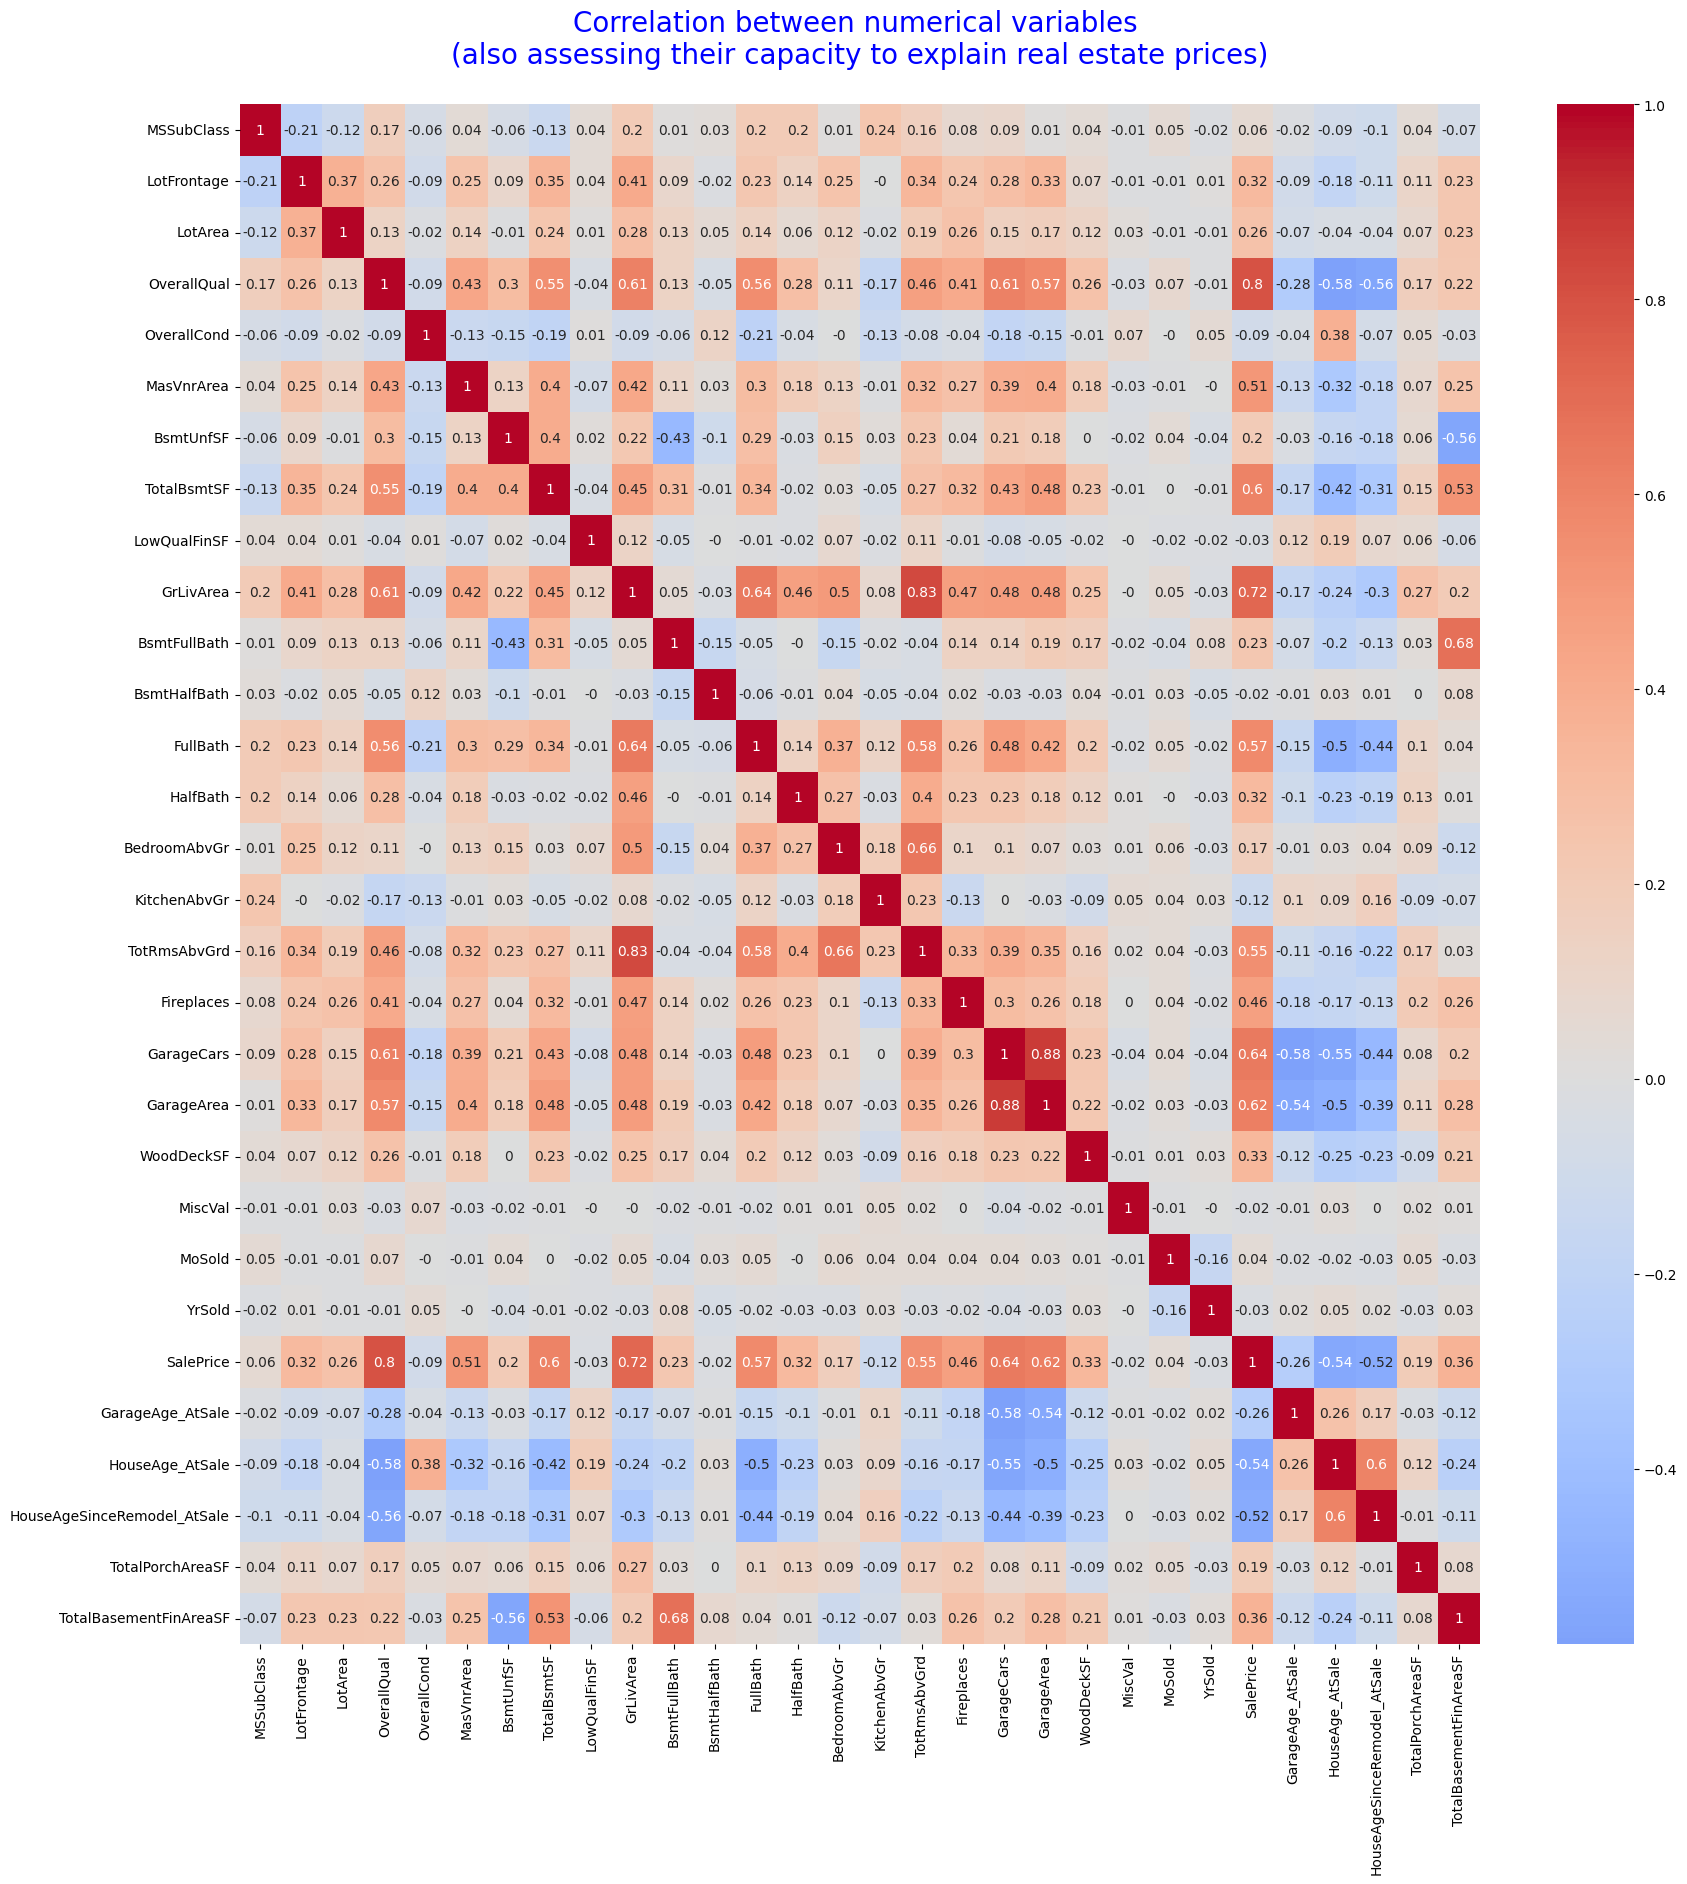

In [117]:
plt.figure(figsize=[20, 20])
sns.heatmap(house_df[numerical_columns].corr().round(2), annot=True, center=0, cmap='coolwarm')
plt.title("Correlation between numerical variables \n(also assessing their capacity to explain real estate prices)\n",
          fontdict=dict(fontsize=20, fontweight=20, color='blue', fontstyle='normal'))
plt.show()

- <span style='color:purple'>Interpretation</span>

  - It is evident that **GarageArea** and **GarageCars** have a significant linear association because garages are typically used for car storage.

  - **OverallQual** & **GarageCars** : <br>Better rated properties command higher rates when they feature garages with ample space for storing cars.

  - **OverallQual** & **GrLivArea** :<br> A house with a larger living area will be valued higher and fetch a higher price.

In [119]:
# Identify Categorical columns
cat_columns = house_df.select_dtypes(include=[np.object_]).columns

1) Create Label Encodes  for categorical variables

In [120]:

for column in cat_columns:
    label_encoder = LabelEncoder()
    label=label_encoder.fit_transform(house_df[column])
    #joining
    colname = '%s_enc'%column
    house_df[colname]=label
    #Drop the old column
    house_df.drop([column],axis=1,inplace=True)
    


    
    


In [121]:
house_df.dtypes

MSSubClass                       int64
LotFrontage                    float64
LotArea                          int64
OverallQual                      int64
OverallCond                      int64
MasVnrArea                     float64
BsmtUnfSF                        int64
TotalBsmtSF                      int64
LowQualFinSF                     int64
GrLivArea                        int64
BsmtFullBath                     int64
BsmtHalfBath                     int64
FullBath                         int64
HalfBath                         int64
BedroomAbvGr                     int64
KitchenAbvGr                     int64
TotRmsAbvGrd                     int64
Fireplaces                       int64
GarageCars                       int64
GarageArea                       int64
WoodDeckSF                       int64
MiscVal                          int64
MoSold                           int64
YrSold                           int64
SalePrice                        int64
GarageAge_AtSale         

In [129]:
# missing value imputation
house_df['MasVnrArea'] = house_df['MasVnrArea'].fillna(0)
house_df['LotFrontage'] = house_df['LotFrontage'].fillna(0)

#### **Splitting the data into Training and Testing sets**

  - <span style='color:purple'>70%</span> of the data will be taken into the <span style='color:purple'>training set</span> and the remaining <span style='color:blue'>30%</span> will be taken into <span style='color:blue'>test set</span>

In [130]:
X = house_df.drop('SalePrice',axis=1)
y = house_df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [131]:
print(f'Shape of the training dataset: {X_train.shape}')
print(f'Shape of the testing dataset: {X_test.shape}')

Shape of the training dataset: (949, 69)
Shape of the testing dataset: (408, 69)


#### **Rescaling the columns using MinMaxScaler class from sklearn**

In [132]:
# instantiate the MinMaxScalar class
scaler = MinMaxScaler()

# rescale the columns
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

#### **Apply transformation to target variable so that it can follow a normal distribution**

In [133]:
power_transformer = PowerTransformer(method='box-cox', standardize=False)
y_train = power_transformer.fit_transform(y_train.to_frame())
y_test = power_transformer.transform(y_test.to_frame())

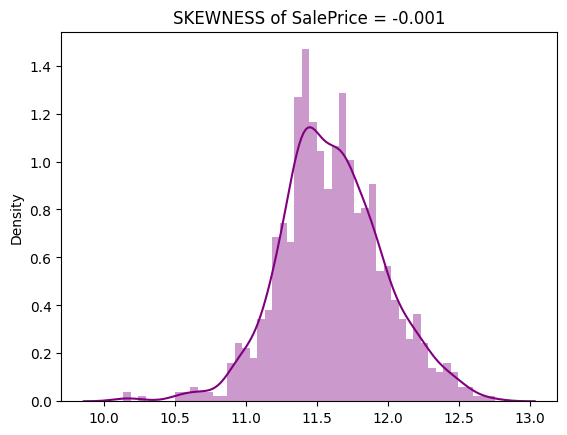

In [134]:
sns.distplot(y_train, bins=50, kde=True, color='purple')
plt.title(f'SKEWNESS of SalePrice = {round(stats.skew(y_train)[0], 3)}')
plt.show()

- <span style='color:blue'>Interpretation</span>
  
  - Target variable is normally ditributed 

#### **Build a Ridge Regression model which will regress on the RFE supported predictors**

In [135]:
# list of hyperparameters to tune
grid_params = {'alpha': [1.0, 2.0, 3.0, 4.0, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 
                         6.0, 6.1, 6.2, 6.3, 6.4, 7.0, 8.0, 9.0, 10.0]}
ridge = Ridge(random_state=100)

# Using RFE to find top 200 variables
rfe = RFE(estimator=Ridge(), n_features_to_select=200)
rfe = rfe.fit(X_train,y_train)
rfe_selected_col = X_train.columns[rfe.support_]
X_train_rfe = X_train[rfe_selected_col]
X_test_rfe = X_test[rfe_selected_col]

# Hyperparamter tuning using GrishSearchCV
folds = 10
model_cv = GridSearchCV(estimator = ridge, param_grid = grid_params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe, y_train)

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
cv_results['param_alpha'] = cv_results['param_alpha'].astype(int)

Fitting 10 folds for each of 23 candidates, totalling 230 fits


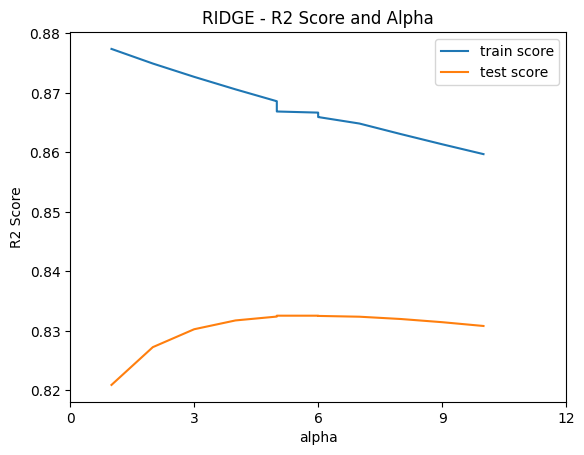

RIDGE - Best alpha is 5
RIDGE - R2 Score of the model on the TRAIN set 0.8677226932215831
RIDGE - R2 Score on the TEST set 0.8683696244005069
RIDGE - Mean Squared Error on the TEST set 0.019568167160690937 


Coefficients associated to predictors of Final Ridge Model


,Ridge Coef
OverallQual,0.407
GrLivArea,0.256
TotRmsAbvGrd,0.202
FullBath,0.176
GarageCars,0.169
BsmtFullBath,0.169
OverallCond,0.159
BedroomAbvGr,0.113
GarageArea,0.109
TotalBsmtSF,0.108


In [136]:
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("RIDGE - R2 Score and Alpha")
plt.legend(['train score', 'test score'])
plt.xticks(np.arange(0,15,3))
plt.show()

ridge_alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('RIDGE - Best alpha is',ridge_alpha)
ridge_final = Ridge(alpha=ridge_alpha, random_state=100)
ridge_final.fit(X_train_rfe,y_train)
ridge_coef = ridge_final.coef_.reshape(1, -1)
df_ridge_coef = pd.DataFrame(ridge_coef, columns=X_train_rfe.columns).T
df_ridge_coef.columns = ['Ridge Coef']
df_ridge_coef.sort_values(by='Ridge Coef', ascending=False, inplace=True)
y_test_pred = ridge_final.predict(X_test_rfe)
y_train_pred = ridge_final.predict(X_train_rfe)
print('RIDGE - R2 Score of the model on the TRAIN set',r2_score(y_train, y_train_pred))
print('RIDGE - R2 Score on the TEST set',r2_score(y_test, y_test_pred))
print('RIDGE - Mean Squared Error on the TEST set', mean_squared_error(y_test, y_test_pred), '\n\n')
print('Coefficients associated to predictors of Final Ridge Model')
df_ridge_coef.head(20)

#### **Residual Analysis for Final Ridge model on the training data**

1) Check whether the error terms meet the assumption of normality

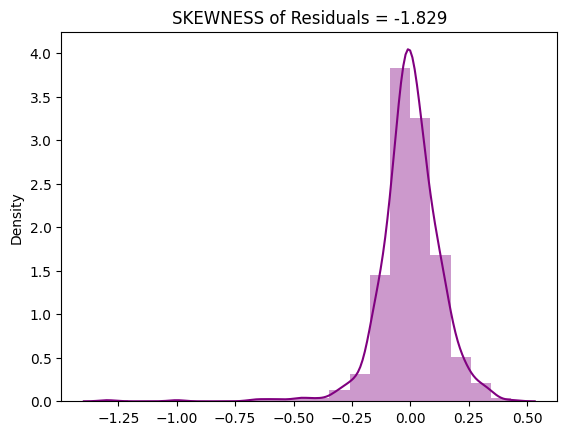

In [137]:
y_train_pred = ridge_final.predict(X_train_rfe)
residuals = y_train - y_train_pred
sns.distplot(residuals, bins=20, color='purple')
plt.title(f'SKEWNESS of Residuals = {round(stats.skew(residuals)[0], 3)}')
plt.show()

- <span style='color:green'>**Interpretation**</span>

  - Error Terms are normally distributed, with mean = 0

#### **Build a Lasso Regression model which will regress on the predictors from X_train**

Fitting 10 folds for each of 9 candidates, totalling 90 fits


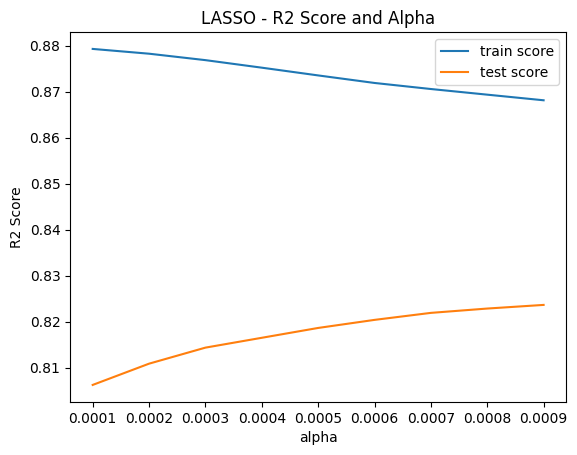

LASSO - Best alpha is 0.0009
LASSO - R2 Score on the TRAIN set 0.8658041361105397
LASSO - R2 Score on the TEST set 0.8772084877324762
LASSO - Mean Squared Error on the TEST set 0.018254182038315116 


Coefficients associated to predictors of Final Lasso Model


,Lasso Coef
OverallQual,0.641
GrLivArea,0.636
GarageCars,0.222
BsmtFullBath,0.168
TotRmsAbvGrd,0.153
OverallCond,0.150
FullBath,0.127
CentralAir_enc,0.093
LandSlope_enc,0.067
SaleCondition_enc,0.064


In [138]:
# Hyperparameters
grid_params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009]}
lasso = Lasso(random_state=100)

# Tuning of Hyperparams
folds = 10
model_cv = GridSearchCV(estimator = lasso, param_grid = grid_params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("LASSO - R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

lasso_alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('LASSO - Best alpha is',lasso_alpha)
lasso_final = Lasso(alpha=lasso_alpha, random_state=100)
lasso_final.fit(X_train_rfe,y_train)
lasso_coef = lasso_final.coef_.reshape(1, -1)
df_lasso_coef = pd.DataFrame(lasso_coef, columns=X_train_rfe.columns).T
df_lasso_coef.columns = ['Lasso Coef']
df_lasso_coef.sort_values(by='Lasso Coef', ascending=False, inplace=True)
y_test_pred = lasso_final.predict(X_test_rfe)
y_train_pred = lasso_final.predict(X_train_rfe)
print('LASSO - R2 Score on the TRAIN set',r2_score(y_train, y_train_pred))
print('LASSO - R2 Score on the TEST set',r2_score(y_test, y_test_pred))
print('LASSO - Mean Squared Error on the TEST set', mean_squared_error(y_test, y_test_pred), '\n\n')
print('Coefficients associated to predictors of Final Lasso Model')
df_lasso_coef.head(20)

#### **Residual Analysis for Final Lasso model on the training data**

1) Check whether the error terms meet the assumption of normality

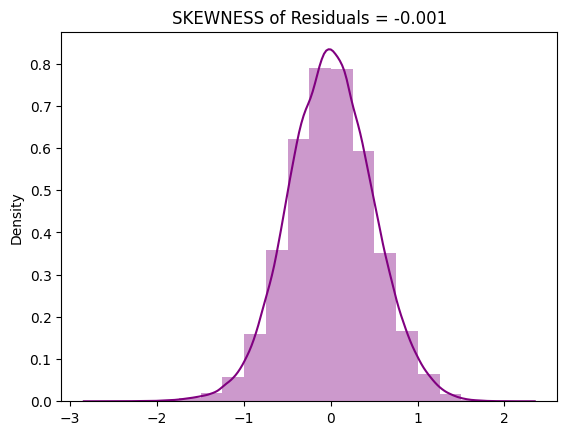

In [139]:
y_train_pred = lasso_final.predict(X_train_rfe)
residuals = y_train - y_train_pred
sns.distplot(residuals, bins=20, color='purple')
plt.title(f'SKEWNESS of Residuals = {round(stats.skew(residuals)[0], 3)}')
plt.show()

<span style="color:blue">**Top 6 Influencers** that are more likely to influence SalePrice</span>

- **OverallQual**
- **GrLivArea**
- **GarageCars** 
- **BsmtFullBath** 
- **TotRmsAbvGrd**
- **OverallCond**

<span style="color:blue">**R2** Score on test set</span>

- ***For Ridge Regression model, R2 Score is 0.86***

- ***For Lasso Regression model, R2 score is 0.87***

#### <span style="color:blue">**Subjective Questions**</span>

1) Building Ridge Model - Double the value of alpha

In [140]:
ridge_model_subjective = Ridge(alpha=ridge_alpha*2,random_state=100)
ridge_model_subjective.fit(X_train_rfe,y_train)
ridge_model_subjective_coef = ridge_model_subjective.coef_.reshape(1, -1)
y_test_pred = ridge_model_subjective.predict(X_test_rfe)
df_ridge_coef2 = pd.DataFrame(ridge_model_subjective_coef, columns=X_test_rfe.columns).T
df_ridge_coef2.columns = ['Ridge Coef - DOUBLE ALPHA']
df_ridge_coef2.sort_values(by='Ridge Coef - DOUBLE ALPHA', ascending=False, inplace=True)
print('RIDGE - R2 Score on test set',r2_score(y_test, y_test_pred))
print('RIDGE - Mean Squared Error on test set', mean_squared_error(y_test, y_test_pred), '\n\n')
print('Top Influencers derived from Ridge After Doubling the value of alpha:')
df_ridge_coef2.head(20)

RIDGE - R2 Score on test set 0.8574347710746615
RIDGE - Mean Squared Error on test set 0.02119374208428483 


Top Influencers derived from Ridge After Doubling the value of alpha:


,Ridge Coef - DOUBLE ALPHA
OverallQual,0.322
GrLivArea,0.199
TotRmsAbvGrd,0.192
FullBath,0.171
GarageCars,0.154
BsmtFullBath,0.145
OverallCond,0.123
GarageArea,0.115
BedroomAbvGr,0.109
TotalBsmtSF,0.095


2) Building Lasso Model - Double the value of alpha

In [141]:
lasso_model_subjective = Lasso(alpha=lasso_alpha*2,random_state=100)
lasso_model_subjective.fit(X_train_rfe,y_train)
lasso_model_subjective_coef = lasso_model_subjective.coef_.reshape(1, -1)
y_test_pred = lasso_model_subjective.predict(X_test_rfe)
df_lasso_coef2 = pd.DataFrame(lasso_model_subjective_coef, columns=X_train_rfe.columns).T
df_lasso_coef2.columns = ['Lasso Coef - DOUBLE ALPHA']
df_lasso_coef2.sort_values(by='Lasso Coef - DOUBLE ALPHA', ascending=False, inplace=True)
print('LASSO - R2 Score on test set',r2_score(y_test, y_test_pred))
print('LASSO - Mean Squared Error on test set', mean_squared_error(y_test, y_test_pred), '\n\n')
print('Top Influencers derived from Lasso After Doubling the value of alpha:')
df_lasso_coef2.head(20)

LASSO - R2 Score on test set 0.8632816897880082
LASSO - Mean Squared Error on test set 0.02032453934717602 


Top Influencers derived from Lasso After Doubling the value of alpha:


,Lasso Coef - DOUBLE ALPHA
OverallQual,0.669
GrLivArea,0.495
GarageCars,0.221
TotRmsAbvGrd,0.184
BsmtFullBath,0.136
FullBath,0.129
CentralAir_enc,0.102
OverallCond,0.072
SaleCondition_enc,0.049
Fireplaces,0.041


After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [142]:
# Dropping the top 5 important predictor variables
X_test_rfe_new = X_test_rfe.drop(['OverallQual','GrLivArea','GarageCars','OverallCond','BsmtFullBath'],axis=1)
X_train_rfe_new = X_train_rfe.drop(['OverallQual','GrLivArea','GarageCars','OverallCond','BsmtFullBath'],axis=1)

In [143]:
# creating new lasso model
lasso_model_subjective_new = Lasso(alpha=lasso_alpha,random_state=100)
lasso_model_subjective_new.fit(X_train_rfe_new,y_train)
lasso_model_subjective_new_coef = lasso_model_subjective_new.coef_.reshape(1, -1)
y_test_pred = lasso_model_subjective_new.predict(X_test_rfe_new)
df_lasso_coef_new = pd.DataFrame(lasso_model_subjective_new_coef, columns=X_train_rfe_new.columns).T
df_lasso_coef_new.columns = ['Lasso Coef For Subjective Question 3']
df_lasso_coef_new.sort_values(by='Lasso Coef For Subjective Question 3', ascending=False, inplace=True)
print('LASSO - R2 Score on test set',r2_score(y_test, y_test_pred))
print('LASSO - Mean Squared Error on test set', mean_squared_error(y_test, y_test_pred), '\n\n')
print('Top Influencers derived from Lasso For Subjective Question 3:')
df_lasso_coef_new[:5]

LASSO - R2 Score on test set 0.8207938032964447
LASSO - Mean Squared Error on test set 0.026640787108263304 


Top Influencers derived from Lasso For Subjective Question 3:


,Lasso Coef For Subjective Question 3
TotalBsmtSF,0.402
TotRmsAbvGrd,0.387
GarageArea,0.329
FullBath,0.231
CentralAir_enc,0.131
